# Scripts to generate graph representations of the models tested in the manuscript

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/USC Random NN')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import networkx as nx
from IPython.display import display, Image, SVG

In [ ]:
def plot_best_graph(rmse_data, adj_mat_data, n_layers=6, var='tas', in_label='In', save_path=None):
  vars_to_predict = ['tas', 'diurnal_temperature_range', 'pr', 'pr90']

  best_idx = np.argmin(rmse_data[n_layers-2, vars_to_predict.index(var)])
  best_adj_mat = adj_mat_data[n_layers-2, best_idx]

  node_size = 0.3
  arrow_size = 0.5

  G = nx.DiGraph()

  G.add_node('In', label=in_label, shape='rectangle', height=node_size, width=2*node_size)
  G.add_node('Out', label='', shape='circle', height=node_size, style='filled', fillcolor='#eec591')

  for i in range(n_layers):
    G.add_node(i+1, label='', shape='circle', height=node_size)

  for i in range(n_layers):
    for j in range(n_layers):
      if best_adj_mat[i,j] == 1:
        if i == n_layers-1:
          G.add_edge(j+1, 'Out', arrowsize=arrow_size)
        else:
          G.add_edge(j+1, i+2, arrowsize=arrow_size)

  G.add_edge('In', 1, arrowsize=arrow_size)

  dot_graph = nx.nx_pydot.to_pydot(G)
  dot_graph.set_margin(0)

  if save_path != None:
    dot_graph.write_pdf(save_path+'.pdf')

  return dot_graph.create_png()

def plot_mlp_graph(n_layers=6, in_label='In', save_path=None):
  node_size = 0.3
  arrow_size = 0.5

  G = nx.DiGraph()

  G.add_node('In', label=in_label, shape='rectangle', height=node_size, width=2*node_size)
  G.add_node('Out', label='', shape='circle', height=node_size, style='filled', fillcolor='#eec591')

  for i in range(n_layers):
    G.add_node(i+1, label='', shape='circle', height=node_size)

  for i in range(1,n_layers):
    G.add_edge(i, i+1, arrowsize=arrow_size)

  G.add_edge('In', 1, arrowsize=arrow_size)
  G.add_edge(n_layers, 'Out', arrowsize=arrow_size)

  dot_graph = nx.nx_pydot.to_pydot(G)
  dot_graph.set_margin(0)

  if save_path != None:
    dot_graph.write_pdf(save_path+'.pdf')

  return dot_graph.create_png()

def plot_one_of_each(rmse_data_list, adj_mat_data_list, n_layers=6, var='tas', in_labels=['In','Conv','Conv-LSTM'], best_models=False, save_path=None):
  vars_to_predict = ['tas', 'diurnal_temperature_range', 'pr', 'pr90']

  if best_models:
    #rand_idx = np.argmin(rmse_data_list[0][n_layers-2, vars_to_predict.index(var)])
    rand_idx = get_best_model_idx(rmse_data_list[0], n_layers, print_rmse=False)
    rand_adj_mat = adj_mat_data_list[0][n_layers-2, rand_idx]

    #cnn_idx = np.argmin(rmse_data_list[1][n_layers-2, vars_to_predict.index(var)])
    cnn_idx = get_best_model_idx(rmse_data_list[1], n_layers, print_rmse=False)
    cnn_adj_mat = adj_mat_data_list[1][n_layers-2, cnn_idx]

    #lstm_idx = np.argmin(rmse_data_list[2][n_layers-2, vars_to_predict.index(var)])
    lstm_idx = get_best_model_idx(rmse_data_list[2], n_layers, print_rmse=False)
    lstm_adj_mat = adj_mat_data_list[2][n_layers-2, lstm_idx]
  else:
    rand_adj_mat = np.random.choice(adj_mat_data_list[0][n_layers-2])
    while np.sum(rand_adj_mat) < n_layers*(n_layers+1)/4:
      rand_adj_mat = np.random.choice(adj_mat_data_list[0][n_layers-2])

    cnn_adj_mat = np.random.choice(adj_mat_data_list[1][n_layers-2])
    while np.sum(cnn_adj_mat) < n_layers*(n_layers+1)/4:
      cnn_adj_mat = np.random.choice(adj_mat_data_list[0][n_layers-2])

    lstm_adj_mat = np.random.choice(adj_mat_data_list[2][n_layers-2])
    while np.sum(lstm_adj_mat) < n_layers*(n_layers+1)/4:
      lstm_adj_mat = np.random.choice(adj_mat_data_list[0][n_layers-2])

  adj_mat_list = [rand_adj_mat, cnn_adj_mat, lstm_adj_mat]

  node_size = 0.3
  arrow_size = 0.5

  G = nx.DiGraph()

  for in_label in in_labels:

    # Create MLP graph
    G.add_node(f'In mlp {in_label}', label=in_label, shape='rectangle', height=node_size, width=2*node_size)
    G.add_node(f'Out mlp {in_label}', label='', shape='circle', height=node_size, style='filled', fillcolor='#eec591')

    for i in range(n_layers):
      G.add_node(f'{i+1} mlp {in_label}', label='', shape='circle', height=node_size)

    for i in range(1,n_layers):
      G.add_edge(f'{i} mlp {in_label}', f'{i+1} mlp {in_label}', arrowsize=arrow_size)

    G.add_edge(f'In mlp {in_label}', f'{1} mlp {in_label}', arrowsize=arrow_size)
    G.add_edge(f'{n_layers} mlp {in_label}', f'Out mlp {in_label}', arrowsize=arrow_size)

    # Create random graph
    G.add_node(f'In {in_label}', label=in_label, shape='rectangle', height=node_size, width=2*node_size)
    G.add_node(f'Out {in_label}', label='', shape='circle', height=node_size, style='filled', fillcolor='#eec591')

    for i in range(n_layers):
      G.add_node(f'{i+1} {in_label}', label='', shape='circle', height=node_size)

    adj_mat = adj_mat_list[in_labels.index(in_label)]

    for i in range(n_layers):
      for j in range(n_layers):
        if adj_mat[i,j] == 1:
          if i == n_layers-1:
            G.add_edge(f'{j+1} {in_label}', f'Out {in_label}', arrowsize=arrow_size)
          else:
            G.add_edge(f'{j+1} {in_label}', f'{i+2} {in_label}', arrowsize=arrow_size)

    G.add_edge(f'In {in_label}', f'{1} {in_label}', arrowsize=arrow_size)

  dot_graph = nx.nx_pydot.to_pydot(G)
  dot_graph.set_margin(0)

  if save_path != None:
    dot_graph.write_pdf(save_path+'.pdf')

  return dot_graph.create_png()

def get_best_model_idx(rmse_data, n_layers, print_rmse=False):
  vars_to_predict = ['tas', 'dtr', 'pr', 'pr90']
  layer_idx = n_layers - 2 

  sorted_tas = sorted(rmse_data[layer_idx,0])
  tas_ranks = [sorted_tas.index(rmse) for rmse in rmse_data[layer_idx,0]]

  sorted_dtr = sorted(rmse_data[layer_idx,1])
  dtr_ranks = [sorted_dtr.index(rmse) for rmse in rmse_data[layer_idx,1]]

  '''
  sorted_pr = sorted(rmse_data[layer_idx,2])
  pr_ranks = [sorted_pr.index(rmse) for rmse in rmse_data[layer_idx,2]]

  sorted_pr90 = sorted(rmse_data[layer_idx,3])
  pr90_ranks = [sorted_pr90.index(rmse) for rmse in rmse_data[layer_idx,3]]
  '''

  overall_ranks = np.array(tas_ranks) + np.array(dtr_ranks) #+ np.array(pr_ranks) + np.array(pr90_ranks)
  
  best_idx = np.argmin(overall_ranks)

  if print_rmse:
    print(f'{n_layers} layer best idx: {best_idx}')
    for i in range(2):
      print(f'{vars_to_predict[i]}: {round(rmse_data[layer_idx,i,best_idx],4)}')
  
  return best_idx

In [ ]:
rand_dense_1M = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/main_experiment/1M/rmse_data.npy')
rand_dense_adj_mats_1M = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/rand_dense/main_experiment/1M/adj_mat_data.npy', allow_pickle=True)

cnn_rand_dense_1M = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/main_experiment/1M/rmse_data.npy')
cnn_rand_dense_adj_mats_1M = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_rand_dense/main_experiment/1M/adj_mat_data.npy', allow_pickle=True)

cnn_lstm_rand_dense_1M_pt1 = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/main_experiment/1M/rmse_data_pt1.npy')
cnn_lstm_rand_dense_1M_pt2 = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/main_experiment/1M/rmse_data_pt2.npy')
cnn_lstm_rand_dense_1M = np.append(cnn_lstm_rand_dense_1M_pt1, cnn_lstm_rand_dense_1M_pt2, axis=0)
cnn_lstm_rand_dense_adj_mats_1M_pt1 = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/main_experiment/1M/adj_mat_data_pt1.npy', allow_pickle=True)
cnn_lstm_rand_dense_adj_mats_1M_pt2 = np.load('./drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/cnn_lstm_rand_dense/main_experiment/1M/adj_mat_data_pt2.npy', allow_pickle=True)
cnn_lstm_rand_dense_adj_mats_1M = np.append(cnn_lstm_rand_dense_adj_mats_1M_pt1, cnn_lstm_rand_dense_adj_mats_1M_pt2, axis=0)

img_path = './drive/My Drive/Colab Notebooks/USC Random NN/images/'

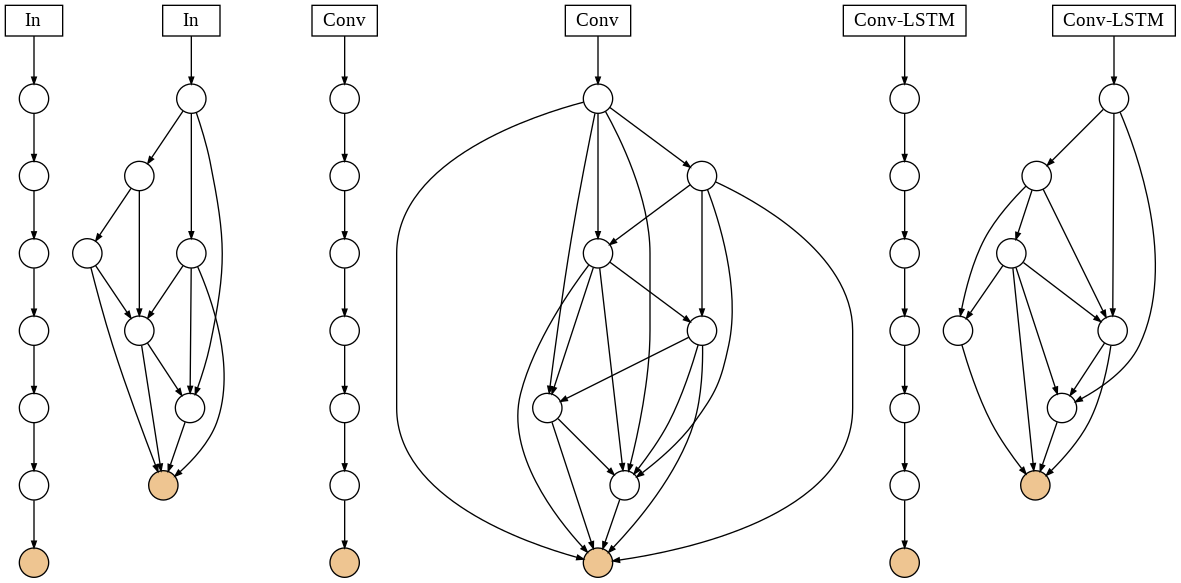

In [ ]:
rmse_list = [rand_dense_1M, cnn_rand_dense_1M, cnn_lstm_rand_dense_1M]
adj_mat_list = [rand_dense_adj_mats_1M, cnn_rand_dense_adj_mats_1M, cnn_lstm_rand_dense_adj_mats_1M]

Image(plot_one_of_each(rmse_list, adj_mat_list, n_layers=6, var='tas', in_labels=['In','Conv','Conv-LSTM'], best_models=True))

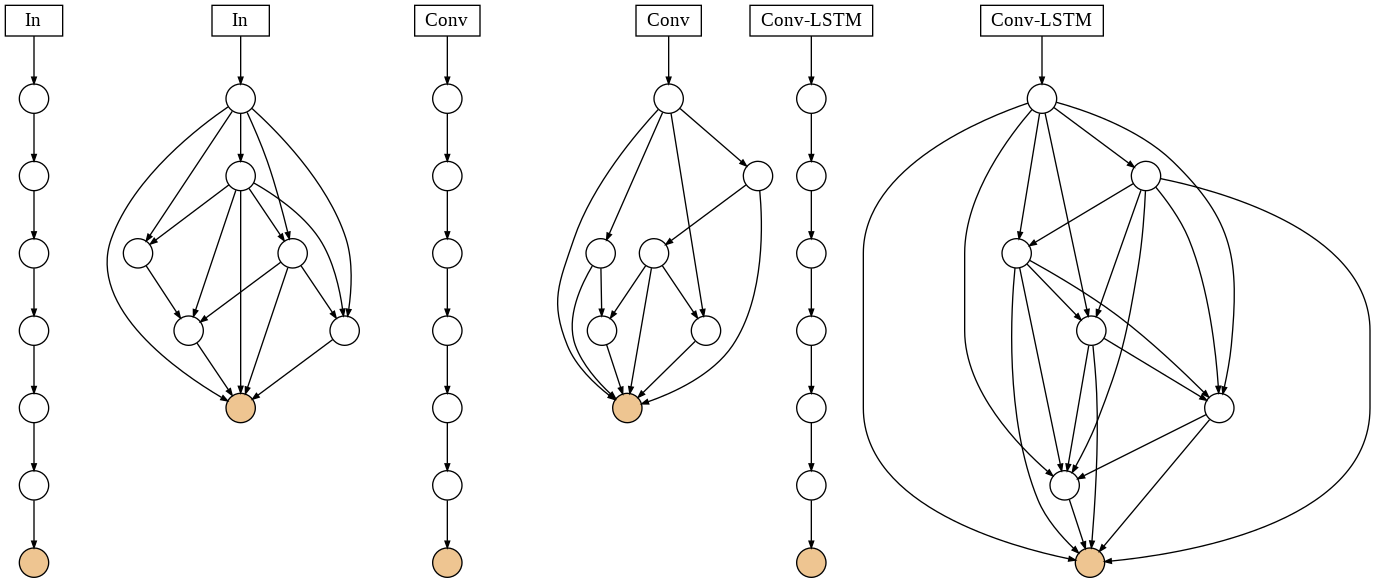

In [ ]:
Image(plot_one_of_each(rmse_list, adj_mat_list, n_layers=6, var='tas', in_labels=['In','Conv','Conv-LSTM'], best_models=False))

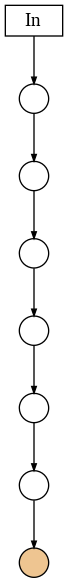

In [ ]:
Image(plot_mlp_graph(n_layers=6, in_label='In', save_path=img_path+'6_layer_mlp'))

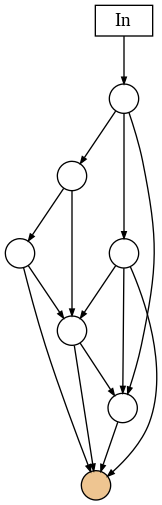

In [ ]:
Image(plot_best_graph(rand_dense_1M, rand_dense_adj_mats_1M, n_layers=6, var='tas', in_label='In', save_path=img_path+'6_layer_rand_dense'))

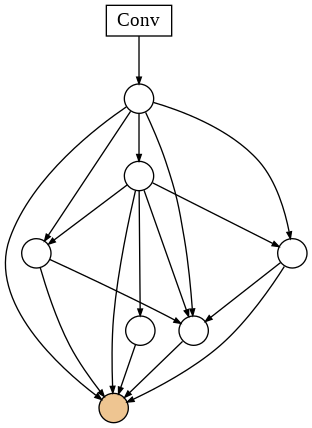

In [ ]:
Image(plot_best_graph(cnn_rand_dense_1M, cnn_rand_dense_adj_mats_1M, n_layers=6, var='tas', in_label='Conv'))

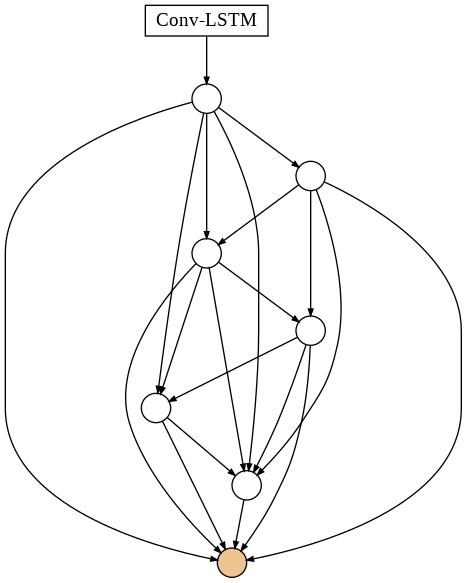

In [ ]:
Image(plot_best_graph(cnn_lstm_rand_dense_1M, cnn_lstm_rand_dense_adj_mats_1M, n_layers=6, var='tas', in_label='Conv-LSTM'))